<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [2]:
# Use local copy of boston_housing.csv file
boston_url='boston_housing.csv'

In [3]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Visualizations
- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

In [5]:
%matplotlib inline

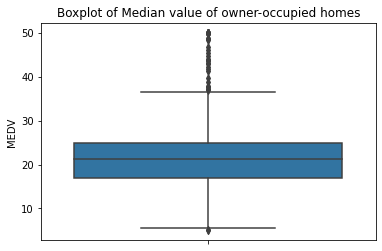

In [6]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(data=boston_df, y='MEDV')
ax.set_title("Boxplot of Median value of owner-occupied homes")
pyplot.show()

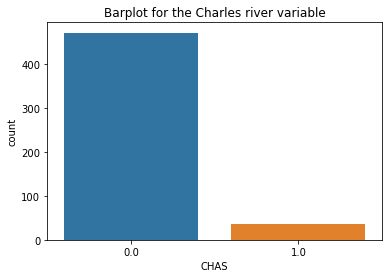

In [7]:
# Provide a bar plot for the Charles river variable

# use countplot instead of barplot to use categorical count as the plotting parameter
ax = sns.countplot(x="CHAS", data=boston_df)
ax.set_title("Barplot for the Charles river variable")
pyplot.show()

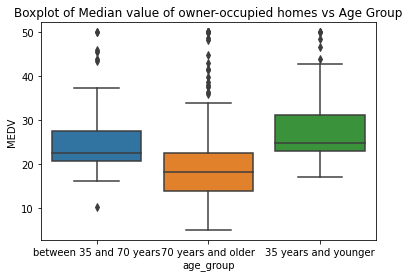

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(data=boston_df, y='MEDV', x='age_group')
ax.set_title("Boxplot of Median value of owner-occupied homes vs Age Group")
pyplot.show()

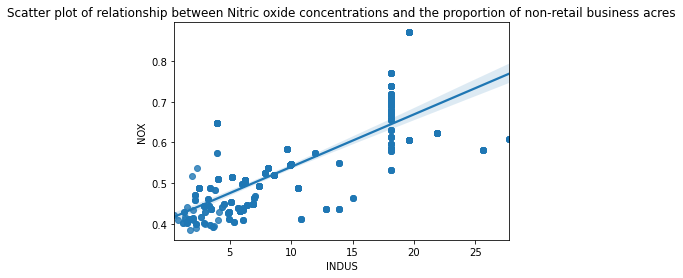

In [9]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# What can you say about the relationship?

# use regplot instead of scatterplot to include trendline
ax = sns.regplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title("Scatter plot of relationship between Nitric oxide concentrations and the proportion of non-retail business acres")
pyplot.show()

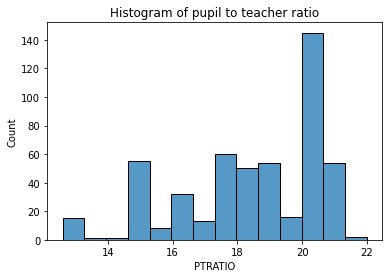

In [10]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(data=boston_df, x='PTRATIO')
ax.set_title("Histogram of pupil to teacher ratio")
pyplot.show()

### Task 5: Use the appropriate tests to answer the questions provided.
For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.

State the conclusion from the test.

In [18]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# T-test for independent samples

H0 = "There is no difference in median value of houses bounded by the Charles river"
H1 = "There is a difference in median value of houses bounded by the Charles river"
alpha = 0.05

t_statistic, p_value = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                            boston_df[boston_df['CHAS'] == 1]['MEDV'])
print("t_stat, p_val", t_statistic, p_value)
if p_value < alpha:
    print("We reject the null hypothesis -", H1)
else:
    print("We fail to reject the null hypothesis -", H0)

t_stat, p_val -3.996437466090509 7.390623170519905e-05
We reject the null hypothesis - There is a difference in median value of houses bounded by the Charles river


In [20]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
# ANOVA

H0 = "There is no difference in median value of houses based on age_group"
H1 = "There is a difference in median value of houses based on age_group"
alpha = 0.05

f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                                            boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                                            boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])

print("f_stat, p_val", f_statistic, p_value)
if p_value < alpha:
    print("We reject the null hypothesis -", H1)
else:
    print("We fail to reject the null hypothesis -", H0)

f_stat, p_val 36.40764999196599 1.7105011022702984e-15
We reject the null hypothesis - There is a difference in median value of houses based on age_group


In [23]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
# Pearson Correlation

H0 = "There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres"
H1 = "There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres"
alpha = 0.05

corr, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

print("corr, p_val", corr, p_value)
if p_value < alpha:
    print("We reject the null hypothesis -", H1)
else:
    print("We fail to reject the null hypothesis -", H0)

corr, p_val 0.763651446920915 7.913361061239593e-98
We reject the null hypothesis - There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres


In [24]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
# Regression analysis

## X is the input variables (or independent variables)
X = boston_df ['DIS']
## y is the target/dependent variable
y = boston_df ['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.21e-08
Time:                        13:53:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""